In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install konlpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 33.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 465.6/465.6 KB 40.4 MB/s eta 0:00:00


### 기존 전처리와는 동일하게 진행

In [ ]:
pwd

'/content'

In [ ]:
%cd /usr/local/lib/python3.8/dist-packages/konlpy/java

/usr/local/lib/python3.8/dist-packages/konlpy/java


In [ ]:
!jar xvf /usr/local/lib/python3.8/dist-packages/konlpy/java/open-korean-text-2.1.0.jar

  created: META-INF/
 inflated: META-INF/MANIFEST.MF
  created: org/
  created: org/openkoreantext/
  created: org/openkoreantext/processor/
  created: org/openkoreantext/processor/normalizer/
  created: org/openkoreantext/processor/phrase_extractor/
  created: org/openkoreantext/processor/qa/
  created: org/openkoreantext/processor/stemmer/
  created: org/openkoreantext/processor/tokenizer/
  created: org/openkoreantext/processor/tools/
  created: org/openkoreantext/processor/util/
  created: org/openkoreantext/processor/util/adjective/
  created: org/openkoreantext/processor/util/adverb/
  created: org/openkoreantext/processor/util/auxiliary/
  created: org/openkoreantext/processor/util/freq/
  created: org/openkoreantext/processor/util/josa/
  created: org/openkoreantext/processor/util/noun/
  created: org/openkoreantext/processor/util/substantives/
  created: org/openkoreantext/processor/util/typos/
  created: org/openkoreantext/processor/util/verb/
 inflated: org/openkoreantext/pr

In [ ]:
with open(f"/usr/local/lib/python3.8/dist-packages/konlpy/java/org/openkoreantext/processor/util/noun/names.txt") as f:
    data = f.read()

In [ ]:
data += '여기어때\n데일리호텔\n야놀자\n인터파크투어\n마이리얼트립\n호텔스닷컴\n익스피디아\n에어비앤비\n부킹닷컴\n트리바고\n스카이스캐너\n호텔스컴파인\n아고다\n가성비\n코로나\n최저가\n본인인증\n체크인\n체크아웃\n카카오톡'

In [ ]:
with open("/usr/local/lib/python3.8/dist-packages/konlpy/java/org/openkoreantext/processor/util/noun/names.txt", 'w') as f:
    f.write(data)

In [ ]:
!jar cvf /usr/local/lib/python3.8/dist-packages/konlpy/java/open-korean-text-2.1.0.jar * 

added manifest
adding: aho-corasick.jar(in = 79138) (out= 76068)(deflated 3%)
adding: bin/(in = 0) (out= 0)(stored 0%)
adding: bin/kr/(in = 0) (out= 0)(stored 0%)
adding: bin/kr/lucypark/(in = 0) (out= 0)(stored 0%)
adding: bin/kr/lucypark/kkma/(in = 0) (out= 0)(stored 0%)
adding: bin/kr/lucypark/kkma/KkmaInterface$3.class(in = 469) (out= 312)(deflated 33%)
adding: bin/kr/lucypark/kkma/KkmaInterface$2.class(in = 455) (out= 291)(deflated 36%)
adding: bin/kr/lucypark/kkma/KkmaInterface.class(in = 2762) (out= 1476)(deflated 46%)
adding: bin/kr/lucypark/kkma/KkmaInterface$4.class(in = 471) (out= 305)(deflated 35%)
adding: bin/kr/lucypark/kkma/KkmaInterface$1.class(in = 453) (out= 297)(deflated 34%)
adding: bin/kr/lucypark/jhannanum/(in = 0) (out= 0)(stored 0%)
adding: bin/kr/lucypark/jhannanum/hannanum/(in = 0) (out= 0)(stored 0%)
adding: bin/kr/lucypark/jhannanum/hannanum/WorkflowFactory.class(in = 2931) (out= 1095)(deflated 62%)
adding: bin/kr/lucypark/jhannanum/comm/(in = 0) (out= 0)(st

In [ ]:
from konlpy.tag import Okt
okt = Okt()

In [ ]:
print(okt.nouns('여기 어때가서 야놀자랑 가성비 좋게 놀아볼까? 카톡해라')) # ['송이레만세']

['여기', '야놀자', '가성비', '카톡']


#### 토픽 데이터 불러오기

In [ ]:
import pandas as pd


topic_all = pd.read_csv('/content/drive/MyDrive/리뷰데이터 분석/데이터셋/데이터함/토픽저장/topic8_dominant.csv')

In [ ]:
topic_all

,Unnamed: 0,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,text
0,7254,7254,0.0,0.1368,"취소, 환불, 수수료, 처리, 요청, 코로나, 상황, 쓰레기, 실수, 입실, 무료,...",분전에 예약하고 취소가 안됨 규정이고 나발이고 삭제함 ㅡㅡ더러워서
1,7388,7388,0.0,0.1557,"취소, 환불, 수수료, 처리, 요청, 코로나, 상황, 쓰레기, 실수, 입실, 무료,...",환불 취소 규정이 개 같은 거 빼고는 잘 이용하고 있어요
2,7393,7393,0.0,0.1840,"취소, 환불, 수수료, 처리, 요청, 코로나, 상황, 쓰레기, 실수, 입실, 무료,...",예약했는데 숙박업체에서 가격 잘못 올렸다고 그 가격에 입실 못한다고 전화 옴 내가 ...
3,1952,1952,0.0,0.1682,"취소, 환불, 수수료, 처리, 요청, 코로나, 상황, 쓰레기, 실수, 입실, 무료,...",호텔과의 연락이 신속합니다 코로나로 환불 불가 상품을 환불받았습니다 감사합니다
4,7397,7397,0.0,0.1940,"취소, 환불, 수수료, 처리, 요청, 코로나, 상황, 쓰레기, 실수, 입실, 무료,...",위치 오류로 인해 취소를 원했는데 환불을 원도 받지 못함 저녁인데 취소 후 다른 고...
...,...,...,...,...,...,...
9814,6956,6956,7.0,0.1422,"리뷰, 후기, 서비스, 업체, 삭제, 모텔, 고객, 때문, 관리, 숙박업소, 소비자...",유튜브 보고 왔는데 가관이 내용 ㅋㅋ
9815,3878,3878,7.0,0.1680,"리뷰, 후기, 서비스, 업체, 삭제, 모텔, 고객, 때문, 관리, 숙박업소, 소비자...",처음 접하는 사용자도 쉽고 빠르고 직관적으로 이해할 수 있는 인터페이스 덕분에 편하...
9816,6951,6951,7.0,0.1528,"리뷰, 후기, 서비스, 업체, 삭제, 모텔, 고객, 때문, 관리, 숙박업소, 소비자...",너무 좋습니다 얼마 전에 잠실 거리에서 짬 모텔이라는 일반 호텔을 묵어보니 문도 고...
9817,6311,6311,7.0,0.1528,"리뷰, 후기, 서비스, 업체, 삭제, 모텔, 고객, 때문, 관리, 숙박업소, 소비자...",야놀자를 가끔 이용합니다 평상시 모텔 이용 가격보다 야놀자 금액을 더 비싸게 받는 ...


In [ ]:
topic_all.columns

Index(['Unnamed: 0', 'Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib',
       'Keywords', 'text'],
      dtype='object')

In [ ]:
topic_all = topic_all.drop(columns = ['Unnamed: 0','Document_No','Topic_Perc_Contrib','Keywords'])

topic_all.columns

Index(['Dominant_Topic', 'text'], dtype='object')

In [ ]:
topic_all['text'] = topic_all['text'].str.replace('여기 어때', '여기어때')
topic_all['text'] = topic_all['text'].str.replace('데일리 호텔', '데일리호텔')
topic_all['text'] = topic_all['text'].str.replace('야 놀자', '야놀자')
topic_all['text'] = topic_all['text'].str.replace('마이 리얼트립', '마이리얼트립')
topic_all['text'] = topic_all['text'].str.replace('마이 리얼 트립', '마이리얼트립')
topic_all['text'] = topic_all['text'].str.replace('인터파크 투어', '인터파크투어')
topic_all['text'] = topic_all['text'].str.replace('인터 파크 투어', '인터파크투어')
topic_all['text'] = topic_all['text'].str.replace('호텔스 닷컴', '호텔스닷컴')
topic_all['text'] = topic_all['text'].str.replace('호텔스 콤바인', '호텔스컴바인')
topic_all['text'] = topic_all['text'].str.replace('에어 비앤비', '에어비앤비')
topic_all['text'] = topic_all['text'].str.replace('부킹 닷컴', '부킹닷컴')

In [ ]:
topic_all.text = topic_all.text.astype(str)
topic_all['text'] = topic_all['text'].str.replace('[^ㄱ-ㅎㅏ-ㅣ가-힣]',' ',regex=True) # 한글이 아니면 빈문자열로 변경
topic_all.shape

(9819, 2)

In [ ]:
import numpy as np

topic_all = topic_all.replace({' ': np.nan})
topic_all = topic_all.replace(r'^\s*$', None, regex=True)
topic_all.dropna(how='any', inplace=True)
topic_all = topic_all.reset_index (drop = True)
print(topic_all.isnull().values.any())

False


In [ ]:
topic_all.shape

(9819, 2)

### 기존 전처리와 동일

In [ ]:
topic_0 = topic_all[topic_all['Dominant_Topic']==0.0]

topic_0

,Dominant_Topic,text
0,0.0,분전에 예약하고 취소가 안됨 규정이고 나발이고 삭제함 ㅡㅡ더러워서
1,0.0,환불 취소 규정이 개 같은 거 빼고는 잘 이용하고 있어요
2,0.0,예약했는데 숙박업체에서 가격 잘못 올렸다고 그 가격에 입실 못한다고 전화 옴 내가 ...
3,0.0,호텔과의 연락이 신속합니다 코로나로 환불 불가 상품을 환불받았습니다 감사합니다
4,0.0,위치 오류로 인해 취소를 원했는데 환불을 원도 받지 못함 저녁인데 취소 후 다른 고...
...,...,...
1395,0.0,사람들이 꼭 후기 보고 앱을 설치하면 좋겠네요 애 약 취소에 대한 규정에 저만 불편...
1396,0.0,올해 처음 앱 깔고 세인트존스와 나인 트리 호텔을 알게 해줬어요가 성비가 심이 둘 ...
1397,0.0,가격도 싸고 전체적으로 편하게 볼 수 있어서 만족합니다 앞으로 이 앱만 이용할 예정...
1398,0.0,가장 쓰기 편한 앱 고객센터도 아주 친절하고 일 처리 잘 함 매우 만족하며 사용 중


In [ ]:
topic_1 = topic_all[topic_all['Dominant_Topic']==1.0]
topic_2 = topic_all[topic_all['Dominant_Topic']==2.0]
topic_3 = topic_all[topic_all['Dominant_Topic']==3.0]
topic_4 = topic_all[topic_all['Dominant_Topic']==4.0]
topic_5 = topic_all[topic_all['Dominant_Topic']==5.0]
topic_6 = topic_all[topic_all['Dominant_Topic']==6.0]
topic_7 = topic_all[topic_all['Dominant_Topic']==7.0]

In [32]:
topic_0 = topic_0.drop(columns = ['Dominant_Topic'])
topic_1 = topic_1.drop(columns = ['Dominant_Topic'])
topic_2 = topic_2.drop(columns = ['Dominant_Topic'])
topic_3 = topic_3.drop(columns = ['Dominant_Topic'])
topic_4 = topic_4.drop(columns = ['Dominant_Topic'])
topic_5 = topic_5.drop(columns = ['Dominant_Topic'])
topic_6 = topic_6.drop(columns = ['Dominant_Topic'])
topic_7 = topic_7.drop(columns = ['Dominant_Topic'])

print(topic_0)

KeyError: ignored

In [33]:
print(topic_0)

                                                   text
0                  분전에 예약하고 취소가 안됨 규정이고 나발이고 삭제함 ㅡㅡ더러워서
1                       환불 취소 규정이 개 같은 거 빼고는 잘 이용하고 있어요
2     예약했는데 숙박업체에서 가격 잘못 올렸다고 그 가격에 입실 못한다고 전화 옴 내가 ...
3           호텔과의 연락이 신속합니다 코로나로 환불 불가 상품을 환불받았습니다 감사합니다
4     위치 오류로 인해 취소를 원했는데 환불을 원도 받지 못함 저녁인데 취소 후 다른 고...
...                                                 ...
1395  사람들이 꼭 후기 보고 앱을 설치하면 좋겠네요 애 약 취소에 대한 규정에 저만 불편...
1396  올해 처음 앱 깔고 세인트존스와 나인 트리 호텔을 알게 해줬어요가 성비가 심이 둘 ...
1397  가격도 싸고 전체적으로 편하게 볼 수 있어서 만족합니다 앞으로 이 앱만 이용할 예정...
1398     가장 쓰기 편한 앱 고객센터도 아주 친절하고 일 처리 잘 함 매우 만족하며 사용 중
1399        박했는데 둘 쨋날에 호텔 컴퓨터 안 돼서 문의했더니 부분 예약 취소도 안 되고

[1400 rows x 1 columns]


In [34]:
topic_0.to_csv('/content/drive/MyDrive/리뷰데이터 분석/데이터셋/데이터함/토픽저장/8가지 각 토픽함/topic_0.csv')
topic_1.to_csv('/content/drive/MyDrive/리뷰데이터 분석/데이터셋/데이터함/토픽저장/8가지 각 토픽함/topic_1.csv')
topic_2.to_csv('/content/drive/MyDrive/리뷰데이터 분석/데이터셋/데이터함/토픽저장/8가지 각 토픽함/topic_2.csv')
topic_3.to_csv('/content/drive/MyDrive/리뷰데이터 분석/데이터셋/데이터함/토픽저장/8가지 각 토픽함/topic_3.csv')
topic_4.to_csv('/content/drive/MyDrive/리뷰데이터 분석/데이터셋/데이터함/토픽저장/8가지 각 토픽함/topic_4.csv')
topic_5.to_csv('/content/drive/MyDrive/리뷰데이터 분석/데이터셋/데이터함/토픽저장/8가지 각 토픽함/topic_5.csv')
topic_6.to_csv('/content/drive/MyDrive/리뷰데이터 분석/데이터셋/데이터함/토픽저장/8가지 각 토픽함/topic_6.csv')
topic_7.to_csv('/content/drive/MyDrive/리뷰데이터 분석/데이터셋/데이터함/토픽저장/8가지 각 토픽함/topic_7.csv')

### 기존 코퍼스 생성

In [35]:
import pandas as pd


all_OTA = pd.read_csv('/content/drive/MyDrive/리뷰데이터 분석/데이터셋/데이터함/all_OTA 맞춤법 데이터(2020~2022)/all_OTA_2.csv')

In [36]:
all_OTA = all_OTA.drop(columns = ['date'])
all_OTA.head(10)

,content
0,사용 후기를 통해 쉽게 예매할 수 있어 좋아요
1,세금 포함 최종 가격 올려주는 기능은 없나요 혼동되네요
2,저렴한 가격 최고의 어플
3,저렴한 가격에 좋은 곳을 소개받을 수 있어 좋아요
4,내용들이 선택하기 좋게 잘 되어 있어요
5,최악의 어플이네 요 카드 결제는 되었는데 어플은 완료 창으로 넘어가지도 않고 기술적...
6,호텔 가격 리뷰 장난치지 마세요
7,뭐냐 이거 요금 짜증 나네만 얼마 뜨길래 결제했더니 만 얼마에서 캐시백 해서 만원
8,진짜 최악이네요 예약 시 환불 불가인 경우 안내 창이라도 뜨게 하세요 장바구니에서 ...
9,상세한 숙박시설 정보와 안전한 예약으로 어플 이용에 만족합니다


In [37]:
all_OTA['content'] = all_OTA['content'].str.replace('여기 어때', '여기어때')
all_OTA['content'] = all_OTA['content'].str.replace('데일리 호텔', '데일리호텔')
all_OTA['content'] = all_OTA['content'].str.replace('야 놀자', '야놀자')
all_OTA['content'] = all_OTA['content'].str.replace('마이 리얼트립', '마이리얼트립')
all_OTA['content'] = all_OTA['content'].str.replace('마이 리얼 트립', '마이리얼트립')
all_OTA['content'] = all_OTA['content'].str.replace('인터파크 투어', '인터파크투어')
all_OTA['content'] = all_OTA['content'].str.replace('인터 파크 투어', '인터파크투어')
all_OTA['content'] = all_OTA['content'].str.replace('호텔스 닷컴', '호텔스닷컴')
all_OTA['content'] = all_OTA['content'].str.replace('호텔스 콤바인', '호텔스컴바인')
all_OTA['content'] = all_OTA['content'].str.replace('에어 비앤비', '에어비앤비')
all_OTA['content'] = all_OTA['content'].str.replace('부킹 닷컴', '부킹닷컴')

In [38]:
all_OTA.content = all_OTA.content.astype(str)
all_OTA['content'] = all_OTA['content'].str.replace('[^ㄱ-ㅎㅏ-ㅣ가-힣]',' ',regex=True) # 한글이 아니면 빈문자열로 변경
all_OTA.shape

(25127, 1)

In [39]:
import numpy as np

all_OTA = all_OTA.replace({' ': np.nan})
all_OTA = all_OTA.replace(r'^\s*$', None, regex=True)
all_OTA.dropna(how='any', inplace=True)
all_OTA = all_OTA.reset_index (drop = True)
print(all_OTA.isnull().values.any()) 

False


In [40]:
#데이터 탐색 -> stopwords를 추가하기 위함!!

explore_corpus=" ".join(all_OTA['content'][:25127].tolist())

In [41]:
import matplotlib.pyplot as plt
import konlpy
from konlpy.tag import Okt

explore_okt = konlpy.tag.Okt()
nouns = explore_okt.nouns(explore_corpus)

In [42]:
# 빈도 탐색
from collections import Counter
counter = Counter(nouns)
#한글자 제거
available_counter = Counter({x: counter[x] for x in counter if len(x) > 1})
available_counter.most_common(800)

[('예약', 7649),
 ('이용', 4117),
 ('사용', 3727),
 ('호텔', 3454),
 ('어플', 3409),
 ('취소', 3184),
 ('숙소', 3101),
 ('가격', 2372),
 ('여행', 2223),
 ('할인', 2170),
 ('다른', 2107),
 ('숙박', 1901),
 ('데일리호텔', 1772),
 ('결제', 1718),
 ('고객', 1643),
 ('환불', 1553),
 ('쿠폰', 1489),
 ('검색', 1286),
 ('정보', 1176),
 ('센터', 1127),
 ('야놀자', 1049),
 ('시간', 1043),
 ('자주', 1003),
 ('항상', 997),
 ('리뷰', 961),
 ('이벤트', 950),
 ('정말', 908),
 ('전화', 880),
 ('업데이트', 797),
 ('확인', 781),
 ('상담', 778),
 ('계속', 775),
 ('비교', 763),
 ('최고', 727),
 ('아주', 719),
 ('선택', 711),
 ('진짜', 706),
 ('연락', 690),
 ('혜택', 648),
 ('보기', 599),
 ('그냥', 598),
 ('다시', 596),
 ('문의', 568),
 ('후기', 559),
 ('사진', 547),
 ('추천', 540),
 ('여기어때', 538),
 ('서비스', 532),
 ('생각', 529),
 ('연결', 525),
 ('가장', 505),
 ('처음', 501),
 ('당일', 494),
 ('제일', 490),
 ('아고다', 480),
 ('업체', 478),
 ('여기', 473),
 ('바로', 471),
 ('수수료', 469),
 ('여러', 461),
 ('사이트', 460),
 ('로그인', 458),
 ('사람', 452),
 ('하나', 445),
 ('최악', 432),
 ('카드', 428),
 ('문제', 422),
 ('오류', 418),
 ('매우', 417

In [43]:
korean_stopwords = pd.read_csv("https://raw.githubusercontent.com/yoonkt200/FastCampusDataset/master/korean_stopwords.txt").values.tolist()
#기본 불용어 set

In [44]:
user_specific_stopwords = ['자주','항상','정말','확인','계속','최고','아주','진짜','그냥','다시','생각','가장','제일','바로','여러',
                           '하나','최악','매우','보고','이번','절대','덕분','잘못','통해','떄문','일리','지금','별로','정도','다음',
                           '기분','해도','부분','가지','모든','매번','제대로','무슨','이상','어디','대한','자체','관련','실제','건가',
                           '조금','자꾸','모두','직접','마음','이제','자기','갑자기','오늘','무조건','거의','가끔','쓰기','수가',
                           '미리','방이','무엇','요즘','하니','달라','이후','포함','짜증','차이','하라','중이','동안','일단','대해',
                           '프로','이해','완료','상태','아예','예전','필요','느낌','해당','활용','얘기','상세','먼저','소개','반복',
                           '거지','대비','수도','전혀','매일','기본','역시','피해','다만','표시','발생','엉망','장난','이름','최근',
                           '예정','사실','중복','위해','이건','완전','한번','또한','거리','시도','대체','불편','종종','시작','어이',
                           '겨우','며칠','그대로','기간','하나요','언제','강추','개도','가기','아이','편이','등등','점도','보이','그것',
                           '방식','심지어','제발','곳도','저희','자로','가요','굿굿','결정','실망','별개','가정','일방','대부분','감사',
                           '거기','화가','원래','중간','그때','더욱','주로','수단','아무','강제','가면','거임','어쩌','분만','무한',
                           '얼마','뭔가','우리','주시','듭니','개판','에어','나중','이전','우선','걱정','번창','정상','방도','신경',
                           '손해','현재','어려움','누가','결과','대박','기도','고민','캐시','다가','굳이','얼마나','한참','현지',
                           '전부','전반','여기저기','평소','그동안','월일','적극','호구','차라리','오후','분도','종일','무시','막상',
                           '진심','각종','제시','여러분','잡기','크게','거나','최소','여부','엘리트','그게','당황','믿음','나름',
                           '도대체','수기','어제','기대','컨디션','위주','드네','일반','혹시','노력','불만','점점','로만','부담',
                           '아치','오지','보호','고생','오전','지난','보통','후회','지급','발전','초기','누구','특급','사이','당장',
                           '분명','가전','별도','벌써','리만','보시','불가능','그거','주기','부탁','오히려','이면','모습','수십',
                           '기억','앵무새','일부','포기','잡고','모로','보지','불구','서로','고요','생기','너희','적도','짱짱',
                           '인지','일부러','나라','이용도','하래','순간','일전','보이지','요새','리가','기록','면서','해주시','부서',
                           '주어','군데','기재','달리','실패','칭찬','중인','존재','일이','율도','아래','나은','대로','주네','보임','푸시',
                           '바람','어찌','전이','자마자','선정','아웃','인도','고려','자리','룰렛','전산','정신','주세부','거부'
                           '숙소','이용','사용','호텔','예약','여행','처음','문제','숙박','사람','어플','경우','당일','날짜','네이버','야놀자','여기어때','아고다','데일리호텔','에어비앤비','인터파크투어','호텔스닷컴','부킹닷컴','호텔스컴파인',
                           '숙소','국내','삭제','모텔','펜션','가족']
                           #'선택','결제'] #토픽에 도움 안되는 것들 추가

for word in user_specific_stopwords:
    korean_stopwords.append([word])

In [45]:
stop_words=[]
for element in korean_stopwords:
    stop_words += element

In [167]:
import pickle

with open("/content/drive/MyDrive/리뷰데이터 분석/데이터셋/데이터함/명사 추출 코퍼스 저장/stop_words.pkl","wb") as f:
    pickle.dump(stop_words, f)

In [168]:
with open("/content/drive/MyDrive/리뷰데이터 분석/데이터셋/데이터함/명사 추출 코퍼스 저장/stop_words.pkl","rb") as f:
    stop_words2 = pickle.load(f)

In [169]:
stop_words2

['휴',
 '아이구',
 '아이쿠',
 '아이고',
 '어',
 '나',
 '우리',
 '저희',
 '따라',
 '의해',
 '을',
 '를',
 '에',
 '의',
 '가',
 '으로',
 '로',
 '에게',
 '뿐이다',
 '의거하여',
 '근거하여',
 '입각하여',
 '기준으로',
 '예하면',
 '예를 들면',
 '예를 들자면',
 '저',
 '소인',
 '소생',
 '저희',
 '지말고',
 '하지마',
 '하지마라',
 '다른',
 '물론',
 '또한',
 '그리고',
 '비길수 없다',
 '해서는 안된다',
 '뿐만 아니라',
 '만이 아니다',
 '만은 아니다',
 '막론하고',
 '관계없이',
 '그치지 않다',
 '그러나',
 '그런데',
 '하지만',
 '든간에',
 '논하지 않다',
 '따지지 않다',
 '설사',
 '비록',
 '더라도',
 '아니면',
 '만 못하다',
 '하는 편이 낫다',
 '불문하고',
 '향하여',
 '향해서',
 '향하다',
 '쪽으로',
 '틈타',
 '이용하여',
 '타다',
 '오르다',
 '제외하고',
 '이 외에',
 '이 밖에',
 '하여야',
 '비로소',
 '한다면 몰라도',
 '외에도',
 '이곳',
 '여기',
 '부터',
 '기점으로',
 '따라서',
 '할 생각이다',
 '하려고하다',
 '이리하여',
 '그리하여',
 '그렇게 함으로써',
 '하지만',
 '일때',
 '할때',
 '앞에서',
 '중에서',
 '보는데서',
 '으로써',
 '로써',
 '까지',
 '해야한다',
 '일것이다',
 '반드시',
 '할줄알다',
 '할수있다',
 '할수있어',
 '임에 틀림없다',
 '한다면',
 '등',
 '등등',
 '제',
 '겨우',
 '단지',
 '다만',
 '할뿐',
 '딩동',
 '댕그',
 '대해서',
 '대하여',
 '대하면',
 '훨씬',
 '얼마나',
 '얼마만큼',
 '얼마큼',
 '남짓',
 '여',
 '얼마간',
 '약간',
 '다소',
 '좀',
 '조금',
 '

In [46]:
import re
from tqdm import tqdm
import time

def tokenize_korean_text(text):
    text = re.sub(r'[^,.?!\w\s]','', text)
    
    okt = konlpy.tag.Okt()
    Okt_morphs = okt.pos(text)
    
    words = []
    for word, pos in Okt_morphs:
        if pos == 'Noun':
          if len(word) > 1:
            if word not in stop_words:
              words.append(word)            
    return words

## 0번 토픽 (환불관련)

In [47]:
topic_0.shape

(1400, 1)

In [48]:
tokenized_list = []

for text in tqdm(topic_0['text'][:1401]):
    tokenized_list.append(tokenize_korean_text(text))

print(len(tokenized_list))
print(tokenized_list[0])

100%|██████████| 1400/1400 [00:10<00:00, 131.09it/s]

1400
['분전', '취소', '규정', '나발']


In [50]:
drop_corpus = []

for index in range(len(tokenized_list)):
    corpus = tokenized_list[index]
    if len(set(corpus)) < 3:   
        topic_0.drop(index, axis='index', inplace=True)
        drop_corpus.append(corpus)
    
for corpus in drop_corpus:
    tokenized_list.remove(corpus)

topic_0.reset_index(drop=True, inplace=True)

In [51]:
topic_0.shape

(1400, 1)

In [52]:
!pip install gensim

import gensim
# bigram 생성에 필요한 library
from gensim.models import Phrases
from gensim.models.phrases import Phraser

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [53]:
bigram = Phrases(tokenized_list, min_count=10, threshold=10)
bigram_mod = Phraser(bigram)
 
# See example
print(bigram_mod[tokenized_list[0]])

['분전', '취소', '규정', '나발']


In [54]:
# tokenized_list의 모든 문서에 대해 bigram을 생성해줌
words_bigram = [bigram_mod[doc] for doc in tokenized_list]

In [55]:
!pip install wget

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9674 sha256=889fa7197254a9d7b7b584043598c2b12b3fb71c1b00ae7650e357264bd76833
  Stored in directory: /root/.cache/pip/wheels/bd/a8/c3/3cf2c14a1837a4e04bd98631724e81f33f462d86a1d895fae0
Successfully built wget


In [56]:
import wget
url = 'http://mallet.cs.umass.edu/dist/mallet-2.0.8.zip'
wget.download(url)

'mallet-2.0.8.zip'

In [57]:
!unzip mallet-2.0.8.zip

Archive:  mallet-2.0.8.zip
   creating: mallet-2.0.8/
   creating: mallet-2.0.8/bin/
  inflating: mallet-2.0.8/bin/classifier2info  
  inflating: mallet-2.0.8/bin/csv2classify  
  inflating: mallet-2.0.8/bin/csv2vectors  
  inflating: mallet-2.0.8/bin/mallet  
  inflating: mallet-2.0.8/bin/mallet.bat  
  inflating: mallet-2.0.8/bin/mallethon  
  inflating: mallet-2.0.8/bin/prepend-license.sh  
  inflating: mallet-2.0.8/bin/svmlight2vectors  
  inflating: mallet-2.0.8/bin/text2classify  
  inflating: mallet-2.0.8/bin/text2vectors  
  inflating: mallet-2.0.8/bin/vectors2classify  
  inflating: mallet-2.0.8/bin/vectors2info  
  inflating: mallet-2.0.8/bin/vectors2topics  
  inflating: mallet-2.0.8/bin/vectors2vectors  
  inflating: mallet-2.0.8/build.xml  
   creating: mallet-2.0.8/class/
   creating: mallet-2.0.8/class/cc/
   creating: mallet-2.0.8/class/cc/mallet/
   creating: mallet-2.0.8/class/cc/mallet/classify/
  inflating: mallet-2.0.8/class/cc/mallet/classify/AdaBoost.class  
  in

In [58]:
import os
from gensim.models.wrappers import LdaMallet
os.environ['MALLET_HOME'] = '/content/mallet-2.0.8'
mallet_path = '/usr/local/lib/python3.8/dist-packages/konlpy/java/mallet-2.0.8/bin/mallet'

In [59]:
import gensim
import gensim.corpora as corpora
from gensim import corpora
from gensim.models.wrappers import LdaMallet
from gensim.models.coherencemodel import CoherenceModel

id2word=corpora.Dictionary(words_bigram)
id2word.filter_extremes(no_below = 5 ) #5회 이하로 등장한 단어는 삭제
texts = words_bigram
corpus=[id2word.doc2bow(text) for text in texts] ## BoW 생성 ##

ldamallet = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=10, id2word=id2word)

In [60]:
def compute_coherence_values(dictionary, corpus, texts, limit, start, step=1):

    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=num_topics, id2word=id2word)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=words_bigram, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

/usr/local/lib/python3.8/dist-packages/smart_open/smart_open_lib.py:496: DeprecationWarning: This function is deprecated.  See https://github.com/RaRe-Technologies/smart_open/blob/develop/MIGRATING_FROM_OLDER_VERSIONS.rst for more information
  warnings.warn(message, category=DeprecationWarning)
/usr/local/lib/python3.8/dist-packages/smart_open/smart_open_lib.py:496: DeprecationWarning: This function is deprecated.  See https://github.com/RaRe-Technologies/smart_open/blob/develop/MIGRATING_FROM_OLDER_VERSIONS.rst for more information
  warnings.warn(message, category=DeprecationWarning)
/usr/local/lib/python3.8/dist-packages/smart_open/smart_open_lib.py:496: DeprecationWarning: This function is deprecated.  See https://github.com/RaRe-Technologies/smart_open/blob/develop/MIGRATING_FROM_OLDER_VERSIONS.rst for more information
  warnings.warn(message, category=DeprecationWarning)
/usr/local/lib/python3.8/dist-packages/smart_open/smart_open_lib.py:496: DeprecationWarning: This function is

Num Topics = 2  has Coherence Value of 0.3264617497661347
Num Topics = 3  has Coherence Value of 0.24908819607152644
Num Topics = 4  has Coherence Value of 0.3081048783036361


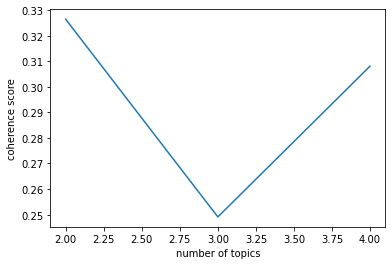

In [126]:
# Can take a long time to run.
model_list, coherence_values = compute_coherence_values(dictionary=id2word, corpus=corpus, texts=words_bigram, start=2, limit=5, step=1)

limit=5; start=2; step=1;
x = range(start, limit, step)
topic_num = 0
count = 0
max_coherence = 0
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", cv,)
    coherence = cv
    if coherence >= max_coherence:
        max_coherence = coherence
        topic_num = m
        model_list_num = count   
    count = count+1
# 높은값이 최적~!~!

plt.plot(x, coherence_values)
plt.xlabel("number of topics")
plt.ylabel("coherence score")
plt.show()
                
# Select the model and print the topics
optimal_model = model_list[model_list_num]
model_topics = optimal_model.show_topics(formatted=False)

In [127]:
gensim_model = gensim.models.wrappers.ldamallet.malletmodel2ldamodel(optimal_model)

In [128]:
perplexity_values = []
for i in range(2,5): # 2~8 하이퍼 파라미터를 변경하면서 점수 계산
    ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics=i, id2word = id2word)
    perplexity_values.append(ldamodel.log_perplexity(corpus)) 

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
/usr/local/lib/python3.8/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.8/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.8/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(El

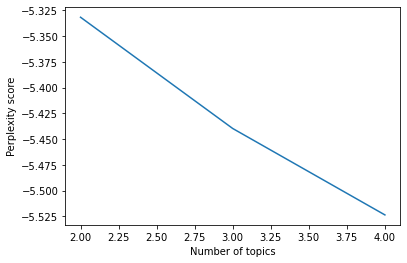

In [129]:
x = range(2,5)
plt.plot(x, perplexity_values)
plt.xlabel("Number of topics")
plt.ylabel("Perplexity score")
plt.show()

In [130]:
gensim_model = gensim.models.wrappers.ldamallet.malletmodel2ldamodel(optimal_model)

In [131]:
!pip install pyLDAvis
import pyLDAvis
import pyLDAvis.gensim_models

pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(gensim_model, corpus, id2word)
vis

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


/usr/local/lib/python3.8/dist-packages/pyLDAvis/_prepare.py:243: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  default_term_info = default_term_info.sort_values(


PreparedData(topic_coordinates=             x    y  topics  cluster       Freq
topic                                          
1      0.00053  0.0       1        1  50.407264
0     -0.00053  0.0       2        1  49.592736, topic_info=      Term       Freq      Total Category  logprob  loglift
1       분전  23.000000  23.000000  Default  30.0000  30.0000
161     이틀  21.000000  21.000000  Default  29.0000  29.0000
162     진자  22.000000  22.000000  Default  28.0000  28.0000
30   고객_센터  22.000000  22.000000  Default  27.0000  27.0000
329     영어  21.000000  21.000000  Default  26.0000  26.0000
..     ...        ...        ...      ...      ...      ...
359     자동  12.194745  23.744108   Topic2  -5.8660   0.0350
43      가게  12.173925  23.740237   Topic2  -5.8677   0.0335
273     대서  12.238032  24.426934   Topic2  -5.8624   0.0102
244     방안  12.176582  24.499577   Topic2  -5.8675   0.0022
41      중개  12.080075  23.649376   Topic2  -5.8754   0.0295

[132 rows x 6 columns], token_table=      Topic      Freq Term
term                      
43        1  0.505471   가게
43        2  0.505471   가게
3         1  0.535028   가격
3         2  0.452716   가격
28        1  0.543999   가능
...     ...       ...  ...
150       2  0.538652   해주
63        1  0.529453   홍보
63        2  0.441211   홍보
295       1  0.524380   휴가
295       2  0.480682   휴가

[198 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 1])

In [171]:
def format_topics_sentences(ldamodel=optimal_model, corpus=corpus, texts=texts):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    #ldamodel[corpus]: lda_model에 corpus를 넣어 각 토픽 당 확률을 알 수 있음
    for i, row in enumerate(ldamodel[corpus]):
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num,topn=20)                            #이거 숫자 바꿈
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']
    print(type(sent_topics_df))

    # Add original text to the end of the output
    #contents = pd.Series(texts)
    #sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    sent_topics_df = pd.concat([sent_topics_df, topic_0['text']], axis=1)
    return(sent_topics_df)


df_topic_sents_keywords = format_topics_sentences(ldamodel=optimal_model, corpus=corpus, texts=words_bigram)

# Format
df_topic_review = df_topic_sents_keywords.reset_index()
df_topic_review.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'text']

# Show각 문서에 대한 토픽
df_dominant_topic=df_topic_review.sort_values(by=['Dominant_Topic'])
df_dominant_topic

/usr/local/lib/python3.8/dist-packages/smart_open/smart_open_lib.py:496: DeprecationWarning: This function is deprecated.  See https://github.com/RaRe-Technologies/smart_open/blob/develop/MIGRATING_FROM_OLDER_VERSIONS.rst for more information
  warnings.warn(message, category=DeprecationWarning)
/usr/local/lib/python3.8/dist-packages/smart_open/smart_open_lib.py:496: DeprecationWarning: This function is deprecated.  See https://github.com/RaRe-Technologies/smart_open/blob/develop/MIGRATING_FROM_OLDER_VERSIONS.rst for more information
  warnings.warn(message, category=DeprecationWarning)


<class 'pandas.core.frame.DataFrame'>


,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,text
0,0,0.0,0.2966,"검색, 기능, 설정, 추가, 계정, 방법, 선택, 탈퇴, 수정, 인원, 아이디, 개...",분전에 예약하고 취소가 안됨 규정이고 나발이고 삭제함 ㅡㅡ더러워서
768,768,0.0,0.2596,"검색, 기능, 설정, 추가, 계정, 방법, 선택, 탈퇴, 수정, 인원, 아이디, 개...",예약 중 로딩 시간이 몇 분이나 걸려서 앱 나갔다가 다시 예약했는데 간 중복 예약되...
769,769,0.0,0.2818,"검색, 기능, 설정, 추가, 계정, 방법, 선택, 탈퇴, 수정, 인원, 아이디, 개...",최악이네요 관리도 대응 방식도 발전이 아니라 쇠퇴해가는 느낌입니다 피크 기간 피해 ...
772,772,0.0,0.2500,"검색, 기능, 설정, 추가, 계정, 방법, 선택, 탈퇴, 수정, 인원, 아이디, 개...",리워드 및 가격 보장 정책이 좋음
773,773,0.0,0.2736,"검색, 기능, 설정, 추가, 계정, 방법, 선택, 탈퇴, 수정, 인원, 아이디, 개...",양남 비치 호텔 좋았어요 참 깨끗하고 친절한 관리자입니다 그리고 물이 매끌매 끌 해용
...,...,...,...,...,...
223,223,3.0,0.2647,"결제, 해결, 설치, 결재, 취소, 할인, 접속, 가격, 고객_센터, 전화, 진행,...",다른 어플보다 할인 쿠폰을 더 많이 줘요 예약 결제할 때도 편리해요 하지만 취소 환...
799,799,3.0,0.2647,"결제, 해결, 설치, 결재, 취소, 할인, 접속, 가격, 고객_센터, 전화, 진행,...",모텔 예약 시 연박으로 하면 부분 취소가 절대 안 되는 것으로 규정이 못 박혀 있네...
221,221,3.0,0.2647,"결제, 해결, 설치, 결재, 취소, 할인, 접속, 가격, 고객_센터, 전화, 진행,...",해외호텔 최저가 보장 쓰여있지만 최저가 아님 모든 호텔인 것처럼 아이콘에 적어두고 ...
78,78,3.0,0.2788,"결제, 해결, 설치, 결재, 취소, 할인, 접속, 가격, 고객_센터, 전화, 진행,...",한 달 전에 크리스마스 예약 한 방 한 달 후에 취소해라고 전화 왔네요 장난치는 것...


In [172]:
# Group top 5 sentences under each topic
sent_topics_sorteddf_mallet = pd.DataFrame()

sent_topics_outdf_grpd = df_topic_sents_keywords.groupby('Dominant_Topic')

for i, grp in sent_topics_outdf_grpd:
    sent_topics_sorteddf_mallet = pd.concat([sent_topics_sorteddf_mallet, 
                                             grp.sort_values(['Perc_Contribution'], ascending=[0]).head(1)], 
                                            axis=0)

# Reset Index    
sent_topics_sorteddf_mallet.reset_index(drop=True, inplace=True)


topic_counts = df_topic_sents_keywords['Dominant_Topic'].value_counts()
topic_counts.sort_index(inplace=True)

topic_contribution = round(topic_counts/topic_counts.sum(), 4)
topic_contribution

lda_inform = pd.concat([sent_topics_sorteddf_mallet, topic_counts, topic_contribution], axis=1)
lda_inform.columns=["Topic_Num", "Topic_Perc_Contrib", "Keywords", "text", "Num_Documents", "Perc_Documents"]
lda_inform = lda_inform[["Topic_Num", "Keywords","Num_Documents","Perc_Documents"]]
lda_inform
#lda_inform.Topic_Num = lda_inform.Topic_Num.astype(int)
lda_inform['Topic_Num'] =lda_inform['Topic_Num'] +1
lda_inform.Topic_Num = lda_inform.Topic_Num.astype(str)
lda_inform['Topic_Num'] =lda_inform['Topic_Num'].str.split('.').str[0]
df_topic_review['Dominant_Topic'] =df_topic_review['Dominant_Topic'] +1
df_topic_review.Dominant_Topic = df_topic_review.Dominant_Topic.astype(str)
df_topic_review['Dominant_Topic'] =df_topic_review['Dominant_Topic'].str.split('.').str[0]

In [173]:
lda_inform.to_csv ("./lda_inform.csv", index = None, encoding="CP949")
lda_inform

,Topic_Num,Keywords,Num_Documents,Perc_Documents
0.0,1,"검색, 기능, 설정, 추가, 계정, 방법, 선택, 탈퇴, 수정, 인원, 아이디, 개...",474,0.3181
1.0,2,"업데이트, 로그인, 오류, 화면, 사진, 메시지, 리뷰, 페이지, 관리, 변경, 목...",453,0.3040
2.0,3,"인증, 입력, 번호, 정보, 이메일, 워드, 회원_가입, 실행, 가능, 가입, 카드...",305,0.2047
3.0,4,"결제, 해결, 설치, 결재, 취소, 할인, 접속, 가격, 고객_센터, 전화, 진행,...",258,0.1732


In [174]:
df_dominant_topic

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,text
0,0,0.0,0.2966,"검색, 기능, 설정, 추가, 계정, 방법, 선택, 탈퇴, 수정, 인원, 아이디, 개...",분전에 예약하고 취소가 안됨 규정이고 나발이고 삭제함 ㅡㅡ더러워서
768,768,0.0,0.2596,"검색, 기능, 설정, 추가, 계정, 방법, 선택, 탈퇴, 수정, 인원, 아이디, 개...",예약 중 로딩 시간이 몇 분이나 걸려서 앱 나갔다가 다시 예약했는데 간 중복 예약되...
769,769,0.0,0.2818,"검색, 기능, 설정, 추가, 계정, 방법, 선택, 탈퇴, 수정, 인원, 아이디, 개...",최악이네요 관리도 대응 방식도 발전이 아니라 쇠퇴해가는 느낌입니다 피크 기간 피해 ...
772,772,0.0,0.2500,"검색, 기능, 설정, 추가, 계정, 방법, 선택, 탈퇴, 수정, 인원, 아이디, 개...",리워드 및 가격 보장 정책이 좋음
773,773,0.0,0.2736,"검색, 기능, 설정, 추가, 계정, 방법, 선택, 탈퇴, 수정, 인원, 아이디, 개...",양남 비치 호텔 좋았어요 참 깨끗하고 친절한 관리자입니다 그리고 물이 매끌매 끌 해용
...,...,...,...,...,...
223,223,3.0,0.2647,"결제, 해결, 설치, 결재, 취소, 할인, 접속, 가격, 고객_센터, 전화, 진행,...",다른 어플보다 할인 쿠폰을 더 많이 줘요 예약 결제할 때도 편리해요 하지만 취소 환...
799,799,3.0,0.2647,"결제, 해결, 설치, 결재, 취소, 할인, 접속, 가격, 고객_센터, 전화, 진행,...",모텔 예약 시 연박으로 하면 부분 취소가 절대 안 되는 것으로 규정이 못 박혀 있네...
221,221,3.0,0.2647,"결제, 해결, 설치, 결재, 취소, 할인, 접속, 가격, 고객_센터, 전화, 진행,...",해외호텔 최저가 보장 쓰여있지만 최저가 아님 모든 호텔인 것처럼 아이콘에 적어두고 ...
78,78,3.0,0.2788,"결제, 해결, 설치, 결재, 취소, 할인, 접속, 가격, 고객_센터, 전화, 진행,...",한 달 전에 크리스마스 예약 한 방 한 달 후에 취소해라고 전화 왔네요 장난치는 것...


In [137]:
lda_inform.to_excel('/content/drive/MyDrive/리뷰데이터 분석/데이터셋/데이터함/토픽저장/8가지 각 토픽함/topic_topic_0.xlsx')

In [138]:
df_dominant_topic.to_csv('/content/drive/MyDrive/리뷰데이터 분석/데이터셋/데이터함/토픽저장/topic_topic_0_dominant.csv')

## 1번 토픽(OTA기능)

In [148]:
topic_1.reset_index(inplace=True)

In [149]:
topic_1

,index,text
0,1400,업데이트했는데 진짜 못 쓰겠음도 대체 예약을 하라는 건지 말라는 건지 모르겠음 날짜...
1,1401,업데이트되고 나서부터 그 지 같네요 뭔 오류가 이리 많은 지리 워드는 보이지도 않습...
2,1402,업데이트 이후 로그인을 할 수가 없네요 아이디 비번 넣는 곳에 글이 안 써져요 빠른...
3,1403,진짜 최악인 게 업데이트 이후 직관성이나 접근성이 떨어진 건 뭐 사람은 다소 불편해...
4,1404,좋아요 중간중간 버전을 모두 담을 수는 없지만 예약이나 기존 예약 체크하기에는 굿
...,...,...
1522,2922,기본 박 이상 예약 가능하게 설정되어 있는 상태에서 박으로 어플에서 조정 가능하게 ...
1523,2923,저렴한 예약 안내 현지 결재 무료 취소 가능 모두 맘에 들어요
1524,2924,오랜만에 이용하는 사람에게는 휴대폰인 증 본인 인증이 너무 듦 이용하고 싶지 않게 ...
1525,2925,업데이트 때문인지 갑자기 아무것도 안 되네 요 로그인도 안 되고 호스팅도 안 되고 ...


In [150]:
tokenized_list = []

for text in tqdm(topic_1['text'][:1600]): #변경
    tokenized_list.append(tokenize_korean_text(text))

print(len(tokenized_list))
print(tokenized_list[0])

100%|██████████| 1527/1527 [00:10<00:00, 141.90it/s]

1527
['업데이트', '선택', '옵션', '선택', '선택', '옵션', '선택', '금액', '조회', '단계', '하자', '종료', '실행', '변화', '리뷰']


In [151]:
drop_corpus = []

for index in range(len(tokenized_list)):
    corpus = tokenized_list[index]
    if len(set(corpus)) < 3:   
        topic_1.drop(index, axis='index', inplace=True) #변경
        drop_corpus.append(corpus)
    
for corpus in drop_corpus:
    tokenized_list.remove(corpus)

topic_1.reset_index(drop=True, inplace=True) #변경

In [152]:
bigram = Phrases(tokenized_list, min_count=10, threshold=10)
bigram_mod = Phraser(bigram)
 
# See example
print(bigram_mod[tokenized_list[0]])

['업데이트', '선택', '옵션', '선택', '선택', '옵션', '선택', '금액', '조회', '단계', '하자', '종료', '실행', '변화', '리뷰']


In [153]:
# tokenized_list의 모든 문서에 대해 bigram을 생성해줌
words_bigram = [bigram_mod[doc] for doc in tokenized_list]

In [154]:
id2word=corpora.Dictionary(words_bigram)
id2word.filter_extremes(no_below = 10 ) #10회 이하로 등장한 단어는 삭제
texts = words_bigram
corpus=[id2word.doc2bow(text) for text in texts] ## BoW 생성 ##

ldamallet = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=10, id2word=id2word)

/usr/local/lib/python3.8/dist-packages/smart_open/smart_open_lib.py:496: DeprecationWarning: This function is deprecated.  See https://github.com/RaRe-Technologies/smart_open/blob/develop/MIGRATING_FROM_OLDER_VERSIONS.rst for more information
  warnings.warn(message, category=DeprecationWarning)
/usr/local/lib/python3.8/dist-packages/smart_open/smart_open_lib.py:496: DeprecationWarning: This function is deprecated.  See https://github.com/RaRe-Technologies/smart_open/blob/develop/MIGRATING_FROM_OLDER_VERSIONS.rst for more information
  warnings.warn(message, category=DeprecationWarning)


/usr/local/lib/python3.8/dist-packages/smart_open/smart_open_lib.py:496: DeprecationWarning: This function is deprecated.  See https://github.com/RaRe-Technologies/smart_open/blob/develop/MIGRATING_FROM_OLDER_VERSIONS.rst for more information
  warnings.warn(message, category=DeprecationWarning)
/usr/local/lib/python3.8/dist-packages/smart_open/smart_open_lib.py:496: DeprecationWarning: This function is deprecated.  See https://github.com/RaRe-Technologies/smart_open/blob/develop/MIGRATING_FROM_OLDER_VERSIONS.rst for more information
  warnings.warn(message, category=DeprecationWarning)
/usr/local/lib/python3.8/dist-packages/smart_open/smart_open_lib.py:496: DeprecationWarning: This function is deprecated.  See https://github.com/RaRe-Technologies/smart_open/blob/develop/MIGRATING_FROM_OLDER_VERSIONS.rst for more information
  warnings.warn(message, category=DeprecationWarning)
/usr/local/lib/python3.8/dist-packages/smart_open/smart_open_lib.py:496: DeprecationWarning: This function is

Num Topics = 2  has Coherence Value of 0.29198714989621255
Num Topics = 3  has Coherence Value of 0.3040172064504199
Num Topics = 4  has Coherence Value of 0.36956089953796656


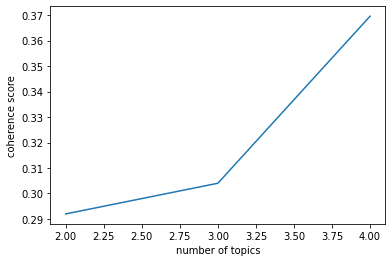

In [155]:
# Can take a long time to run.
model_list, coherence_values = compute_coherence_values(dictionary=id2word, corpus=corpus, texts=words_bigram, start=2, limit=5, step=1)

limit=5; start=2; step=1;
x = range(start, limit, step)
topic_num = 0
count = 0
max_coherence = 0
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", cv,)
    coherence = cv
    if coherence >= max_coherence:
        max_coherence = coherence
        topic_num = m
        model_list_num = count   
    count = count+1
# 높은값이 최적~!~!

plt.plot(x, coherence_values)
plt.xlabel("number of topics")
plt.ylabel("coherence score")
plt.show()
                
# Select the model and print the topics
optimal_model = model_list[model_list_num]
model_topics = optimal_model.show_topics(formatted=False)

In [156]:
gensim_model = gensim.models.wrappers.ldamallet.malletmodel2ldamodel(optimal_model)

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
/usr/local/lib/python3.8/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.8/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.8/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(El

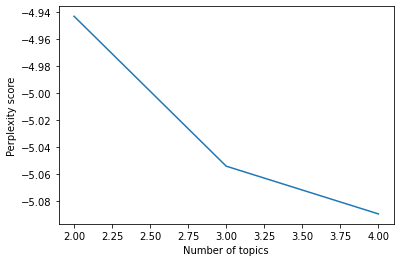

In [157]:
perplexity_values = []
for i in range(2,5): # 2~8 하이퍼 파라미터를 변경하면서 점수 계산
    ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics=i, id2word = id2word)
    perplexity_values.append(ldamodel.log_perplexity(corpus)) 

x = range(2,5)
plt.plot(x, perplexity_values)
plt.xlabel("Number of topics")
plt.ylabel("Perplexity score")
plt.show()

In [158]:
gensim_model = gensim.models.wrappers.ldamallet.malletmodel2ldamodel(optimal_model)

In [159]:
vis = pyLDAvis.gensim_models.prepare(gensim_model, corpus, id2word)
vis

/usr/local/lib/python3.8/dist-packages/pyLDAvis/_prepare.py:243: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  default_term_info = default_term_info.sort_values(


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3     -0.000663  0.000701       1        1  25.310688
0      0.000059  0.000085       2        1  25.096523
2     -0.000397 -0.000891       3        1  25.078224
1      0.001000  0.000106       4        1  24.514565, topic_info=      Term       Freq      Total Category  logprob  loglift
91      업체  38.000000  38.000000  Default  30.0000  30.0000
168    신분증  38.000000  38.000000  Default  29.0000  29.0000
22   회원_가입  38.000000  38.000000  Default  28.0000  28.0000
18      요청  38.000000  38.000000  Default  27.0000  27.0000
69      전화  40.000000  40.000000  Default  26.0000  26.0000
..     ...        ...        ...      ...      ...      ...
120    이벤트  10.478926  41.082573   Topic4  -5.0447   0.0397
98      관리  10.494679  41.797715   Topic4  -5.0432   0.0239
58      때문  10.323977  40.284297   Topic4  -5.0596   0.0444
99      가격  10.421463  43.780304   Topic4  -5.0502  -0.0294
126     코드  10.243374  41.535168   Topic4  -5.0674   0.0060

[194 rows x 6 columns], token_table=      Topic      Freq Term
term                      
99        1  0.251255   가격
99        2  0.274096   가격
99        3  0.251255   가격
99        4  0.228413   가격
26        1  0.277113   가능
...     ...       ...  ...
36        4  0.223530   후기
143       1  0.272632  휴대폰
143       2  0.245368  휴대폰
143       3  0.245368  휴대폰
143       4  0.218105  휴대폰

[508 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 1, 3, 2])

In [163]:
df_topic_sents_keywords = format_topics_sentences(ldamodel=optimal_model, corpus=corpus, texts=words_bigram)

# Format
df_topic_review = df_topic_sents_keywords.reset_index()
df_topic_review.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'text']

# Show각 문서에 대한 토픽
df_dominant_topic=df_topic_review.sort_values(by=['Dominant_Topic'])
df_dominant_topic

/usr/local/lib/python3.8/dist-packages/smart_open/smart_open_lib.py:496: DeprecationWarning: This function is deprecated.  See https://github.com/RaRe-Technologies/smart_open/blob/develop/MIGRATING_FROM_OLDER_VERSIONS.rst for more information
  warnings.warn(message, category=DeprecationWarning)
/usr/local/lib/python3.8/dist-packages/smart_open/smart_open_lib.py:496: DeprecationWarning: This function is deprecated.  See https://github.com/RaRe-Technologies/smart_open/blob/develop/MIGRATING_FROM_OLDER_VERSIONS.rst for more information
  warnings.warn(message, category=DeprecationWarning)


<class 'pandas.core.frame.DataFrame'>


,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,text
0,0,0.0,0.2966,"검색, 기능, 설정, 추가, 계정, 방법, 선택, 탈퇴, 수정, 인원, 아이디, 개...",사용 후기를 통해 쉽게 예매할 수 있어 좋아요
768,768,0.0,0.2596,"검색, 기능, 설정, 추가, 계정, 방법, 선택, 탈퇴, 수정, 인원, 아이디, 개...",편리한 예약 타 사이트 대비 저렴한 숙박지 주 이용합니다
769,769,0.0,0.2818,"검색, 기능, 설정, 추가, 계정, 방법, 선택, 탈퇴, 수정, 인원, 아이디, 개...",다른 호텔 예약 앱보다 좋아요 호텔 예약 시 어느 지역인지 나타나게 하면 좋을 거 ...
772,772,0.0,0.2500,"검색, 기능, 설정, 추가, 계정, 방법, 선택, 탈퇴, 수정, 인원, 아이디, 개...",아고다는 정말 좋은 숙소와 여행 정보를 제공해주네요
773,773,0.0,0.2736,"검색, 기능, 설정, 추가, 계정, 방법, 선택, 탈퇴, 수정, 인원, 아이디, 개...",예약이 편합니다
...,...,...,...,...,...
25107,25107,NaN,NaN,NaN,너무 조아여 가격 저렴해요
25108,25108,NaN,NaN,NaN,환불 자체를 아예 안 해주는 편이네 요항상 방 배정이랑 방일 적실 수 환불 전혀 안...
25109,25109,NaN,NaN,NaN,호텔 예약했는데 알고 보니 입실시간이 저녁 시네요 황당한 네 그기에 당일 예약이라 ...
25110,25110,NaN,NaN,NaN,다운로드 대기 중이라고만 뜨고 계속 다운이 안 되는데 해결할 방법이 있나요


In [164]:
lda_inform.to_csv ("./lda_inform.csv", index = None, encoding="CP949")
lda_inform

,Topic_Num,Keywords,Num_Documents,Perc_Documents
0.0,1,"환불, 수수료, 결제, 연락, 규정, 입실, 불가, 쓰레기, 정책, 변경, 쿠폰, ...",837,0.6043
1.0,2,"고객_센터, 처리, 전화, 요청, 코로나, 상담, 고객, 업체, 문의, 가격, 무료...",548,0.3957


## 2번 토픽 (숙소 정보)